# Gibbs sampling of 2D Normal 


## Sample 2D density by the Gibbs algorithm. Perform the one-dimensional sampling by the Inverse Cumulative Distribution Function (ICDF) algorithm. Plot the scatter plot.

### Variant 5

$$
p(x, y)=\frac{2}{9}(3 x+2 y+2) \quad 0 \leq x, y \leq 1
$$

### First, let's find conditional normal for X|Y (given Y), and for Y|X (given X).
$$
p(x \mid y)=\frac{p(x, y)}{p(y)}
$$
$$
p(y)=\int_{-\infty}^{\infty} p(x, y) d x=\int_{0}^{1} p(x, y) d x=\int_{0}^{1} \frac{2}{9}(3 x+2 y+2) d x=\frac{2}{9} \int_{0}^{1}(3 x+2 y+2) d x=\frac{2}{9}(3.5+2 y)
$$
Finally, 

$$
p(x \mid y)=\frac{p(x, y)}{p(y)}=\frac{\frac{2}{9}(3 x+2 y+2)}{\frac{2}{9}(2 y+3.5)}=\frac{3 x+2 y+2}{2 y+3.5}
$$


The same for p(y|x).
$$
p(x)=\int_{-\infty}^{\infty} p(x, y) d y=\int_{0}^{1} p(x, y) d y=\int_{0}^{1} \frac{2}{9}(3 x+2 y+2) d y=\frac{2}{9} \int_{0}^{1}(3 x+2 y+2) d y=\frac{2}{9}(3 x+3)
$$

$$
p(y \mid x)=\frac{p(x, y)}{p(x)}=\frac{\frac{2}{9}(3 x+2 y+2)}{\frac{2}{9}(3 x+3)}=\frac{3 x+2 y+2}{3 x+3}
$$

### ICDF algorithm for sampling from conditional distributions.

From $U \sim \operatorname{Unif}[0,1]$, we want to generate $X$ with $\mathrm{CDF} \ F_{X}(x) .$ 
We want to see if we can find some strictly monotone transformation $T:[0,1] \mapsto \mathbb{R},$ such that $T(U) \stackrel{d}{=} X .$ Note that our marginal CDF are monotonous. 

We will have
$F_{X}(x)=\operatorname{Pr}(X \leq x)=\operatorname{Pr}(T(U) \leq x)=\operatorname{Pr}\left(U \leq T^{-1}(x)\right)=T^{-1}(x),$ for $x \in \mathbb{R}$
where the last step used that $\operatorname{Pr}(U \leq y)=y$ when $U$ is uniform on (0,1)
So we got $F_{X}$ to be the inverse function of $T,$ or, equivalently $T(u)=F_{X}^{-1}(u), u \in[0,1]$
Therefore, we can generate $X$ from $F_{X}^{-1}(U).$ The inverse function for CDF exists because CDF is monotonous by definition.



$$
p(x \mid y = \hat{y})=f(x) = \frac{3 x+2 \hat{y}+2}{2 \hat{y}+3.5}, \ F(x)=\int_{0}^{x} f\left(x^{\prime}\right) d x^{\prime}=\int_{0}^{x} \frac{3 x^{\prime}}{2 \hat{y} + 3.5} d x^{\prime} + \frac{2 \hat{y}+2}{2 \hat{y}+ 3.5} x=\frac{1.5 x^{2} + \left(2\hat{y}+2\right) x}{2 \hat{y}+ 3.5} = u
$$

$$
1.5 x^{2} + \left(2\hat{y}+2\right) x + \left(2\hat{y} + 3.5 \right)u = 0 
$$

$$
D = b^{2} - 4 a c = D\left(\hat{y}, u \right)
$$

$$
x=\frac{-b+\sqrt{D}}{4 a}
$$
We choose 'x' with plus because 0 ≤ x ≤ 1.

Similarly we can write for p(y|x).

$$
y^{2} + \left(3\hat{x}+2\right) x + \left(3\hat{x} + 3\right)u = 0 
$$

$$
u = \frac{y^{2} + \left(3 \hat{x} +2\right) y}{3 \hat{x} + 3} 
$$

$$
D = b^{2} - 4 a c = D\left(\hat{x}, u \right)
$$


### Creating a function for sampling from conditional distribution and function for Gibbs sampling.

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
# sampling from conditional distribution 
def ICDF(sampling_index, current_point):
    conditioned_index = 1 - sampling_index
    u = random.uniform(0, 1)      #choose u from uniform distribution U(0,1)

    if conditioned_index == 1: 
        y = current_point[1]
        a = 1.5
        b = 2*y + 2
        c = -(2*y+3.5)*u
    else:
        x = current_point[0]
        a = 1
        b = 3*x + 2
        c = -(3*x + 3)*u
    discr = b ** 2 - 4 * a * c
    new_value = (-b + math.sqrt(discr)) / (2 * a)
    new_x = np.copy(current_point)
    new_x[sampling_index] = new_value
    return new_x

In [54]:
#Gibbs sampling
def gibbs(initial_point, num_samples):
    point = np.array(initial_point, dtype=float)
    
    samples = np.empty([num_samples + 1, 2]) #array of sample points
    samples[0] = point
    
    for i in range(num_samples):
        point = ICDF(0, point)
        point = ICDF(1, point)
        samples[i + 1] = point
    
    return samples

In [55]:
initial_point = [0, 0]
number_of_samples = 1000 #number of samples
samples = gibbs(initial_point, number_of_samples)

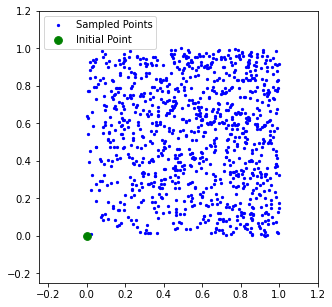

In [56]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

ax.scatter(samples[:number_of_samples, 0], samples[:number_of_samples, 1], c='b', s=5, label="Sampled Points")
ax.scatter(samples[0, 0], samples[0, 1], marker='o', c='g', s=60, label="Initial Point")
ax.set_xlim((-0.25, 1.2))
ax.set_ylim((-0.25, 1.2))

ax.legend(loc='upper left')
plt.show()

